In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta, date

In [2]:
main_df = pd.read_csv('../data/requests_census_neighborhoods.csv')
main_df

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_55573/1183661926.py:1: DtypeWarning: Columns (2,3,5,7,8,9,10,47) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv('../data/requests_census_neighborhoods.csv')


,ZIP,Households (Count),White (Count),Black or African American (Count),American Indian and Alaska Native (Count),Asian (Count),Native Hawaiian and Other Pacific Islander (Count),Some other race (Count),Two or more races (Count),Hispanic or Latino origin (of any race) (Count),...,Address,City,Council District,Latitude,Longitude,Mapped Location,Time to Resolve,Hours to Resolve,Days to Resolve,Neighborhood
0,37013,"35,483","16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,3613 Wells Ct,ANTIOCH,33.0,36.080968,-86.602406,"(36.080968, -86.602406)",4 days 23:09:25,119.156944,4.964873,Antioch / Cane Ridge
1,37013,"35,483","16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,2371 Una Antioch Pike,ANTIOCH,28.0,36.072191,-86.664342,"(36.07219072, -86.66434192)",2 days 16:16:00,64.266667,2.677778,Antioch / Cane Ridge
2,37013,"35,483","16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,109 Grovedale Trace,ANTIOCH,33.0,36.050526,-86.606362,"(36.05052579, -86.60636223)",35 days 15:25:00,855.416667,35.642361,Antioch / Cane Ridge
3,37013,"35,483","16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,3005 W Towne Village Ct,ANTIOCH,29.0,36.073930,-86.609670,"(36.07393, -86.60967)",7 days 00:04:00,168.066667,7.002778,Antioch / Cane Ridge
4,37013,"35,483","16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,5045 Mountain Springs Rd,ANTIOCH,32.0,36.044549,-86.612186,"(36.0445494, -86.6121858)",1 days 04:29:00,28.483333,1.186806,Antioch / Cane Ridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722021,37228,"1,249",496,533,0.0,16,33.0,0,171,0,...,1927 5th Ave N,NASHVILLE,21.0,36.187059,-86.797371,"(36.187058700238445, -86.7973711900413)",0 days 00:00:00,0.000000,0.000000,Metrocenter
722022,37228,"1,249",496,533,0.0,16,33.0,0,171,0,...,Great Circle Rd & Rosa L Parks Blvd,NASHVILLE,2.0,36.193622,-86.806912,"(36.19362231161992, -86.80691239999999)",NaN,NaN,NaN,Metrocenter
722023,37228,"1,249",496,533,0.0,16,33.0,0,171,0,...,2014 Rosa L Parks Blvd,NASHVILLE,2.0,36.187579,-86.800050,"(36.1875790690887, -86.8000497110188)",67 days 05:44:04,1613.734444,67.238935,Metrocenter
722024,37228,"1,249",496,533,0.0,16,33.0,0,171,0,...,101 Athens Way,NASHVILLE,2.0,36.198301,-86.798659,"(36.1983009, -86.7986588)",0 days 00:00:00,0.000000,0.000000,Metrocenter


In [11]:
main_df.columns = main_df.columns.str.strip()

In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722026 entries, 0 to 722025
Data columns (total 55 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   ZIP                                                                722026 non-null  int64  
 1   Households (Count)                                                 722026 non-null  object 
 2   White (Count)                                                      722026 non-null  object 
 3   Black or African American (Count)                                  722026 non-null  object 
 4   American Indian and Alaska Native (Count)                          722026 non-null  float64
 5   Asian (Count)                                                      722026 non-null  object 
 6   Native Hawaiian and Other Pacific Islander (Count)                 722026 non-null  float64
 7   Some other 

In [4]:
main_df.groupby(['Neighborhood', 'Request Type']).agg({'Days to Resolve':'mean'})

Days to Resolve
Neighborhood                                       Request Type                                           
12 South / Belmont / Lipscomb / Green Hills / O... COVID-19                                       1.949268
                                                   Education & Libraries                               NaN
                                                   Electric & Water General                      18.674932
                                                   Hands On Volunteers                           34.050174
                                                   OEMTREE                                        0.271748
...                                                                                                    ...
Whites Creek                                       Resolved by hubNashville on First Call         0.000000
                                                   Streets, Roads & Sidewalks                    26.715965
                                                   Transit                                        9.161481
                                                   Trash, Recycling & Litter                     18.705864
                                                   Trees                                          0.000775

[531 rows x 1 columns]

In [5]:
neighborhood_requests = main_df.groupby('Neighborhood')['Request Type'].value_counts()
neighborhood_requests.info()

<class 'pandas.core.series.Series'>
MultiIndex: 531 entries, ('12 South / Belmont / Lipscomb / Green Hills / Oak Hill / Edgehill', 'Trash, Recycling & Litter') to ('Whites Creek', 'Trees')
Series name: Request Type
Non-Null Count  Dtype
--------------  -----
531 non-null    int64
dtypes: int64(1)
memory usage: 5.8+ KB


In [13]:
income_zips = main_df.iloc[:, [0, 21, 33, 34, 35, 53, 54]]
income_zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722026 entries, 0 to 722025
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ZIP                         722026 non-null  int64  
 1   Households (Median Income)  722026 non-null  object 
 2   Request Type                722018 non-null  object 
 3   Subrequest Type             721700 non-null  object 
 4   Additional Subrequest Type  686587 non-null  object 
 5   Days to Resolve             710463 non-null  float64
 6   Neighborhood                722026 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 38.6+ MB


In [14]:
income_zips.head()

,ZIP,Households (Median Income),Request Type,Subrequest Type,Additional Subrequest Type,Days to Resolve,Neighborhood
0,37013,"61,801","Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,4.964873,Antioch / Cane Ridge
1,37013,"61,801","Streets, Roads & Sidewalks",Request New Sign,Request New Sign,2.677778,Antioch / Cane Ridge
2,37013,"61,801",Property Violations,Cars Parked on Lawn,Cars Parked on Lawn,35.642361,Antioch / Cane Ridge
3,37013,"61,801","Streets, Roads & Sidewalks",Remove debris in roadway,Roadway,7.002778,Antioch / Cane Ridge
4,37013,"61,801","Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,1.186806,Antioch / Cane Ridge


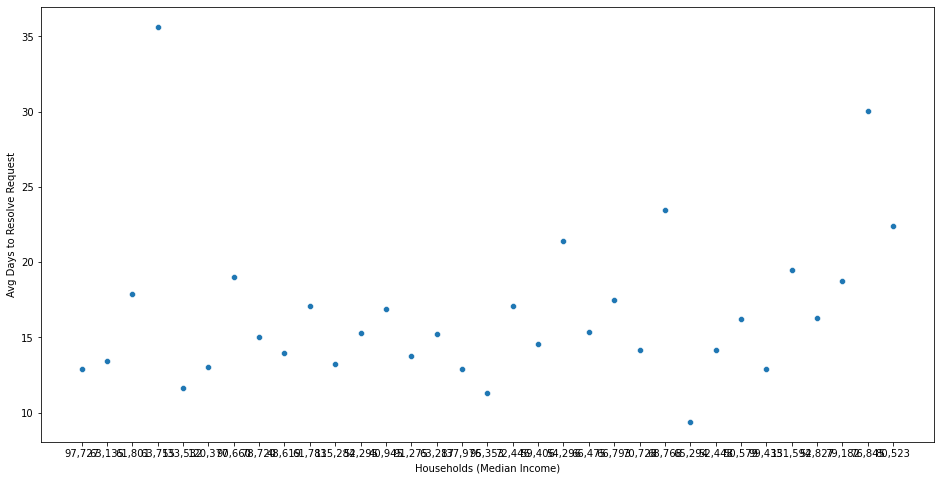

In [28]:
def resolve_mean(income_zips):
    return income_zips['Days to Resolve'].mean()
income_zips_group = income_zips.groupby(['Neighborhood', 'Households (Median Income)']).apply(resolve_mean)
income_zips_group = income_zips_group.reset_index()
plt.figure(figsize = (16, 8))
sns.scatterplot(data = income_zips_group, x = 'Households (Median Income)', y = 0)
plt.ylabel('Avg Days to Resolve Request');

In [45]:
income_zips_group.sort_values(by = ['Households (Median Income)'], ascending = False)

,Neighborhood,Households (Median Income),0
27,Mt Juliet / Gladeville,"99,435",12.894327
0,12 South / Belmont / Lipscomb / Green Hills / ...,"97,727",12.921212
16,Downtown Nashville,"95,353",11.279524
13,Central Business District / Downtown,"91,275",13.782279
6,Bellevue,"90,660",19.038481
32,Whites Creek,"80,523",22.372017
30,Old Hickory,"79,182",18.744907
7,Belmont / Hillsboro Village / Music Row / Vand...,"78,720",15.016678
31,Pegram,"76,845",30.058659
17,East Nashville / Lockeland Springs,"72,446",17.074394
